In [1]:
import os
import yaml
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

C:\Users\USS\anaconda3\envs\tf310\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
# Cargar configuración
with open("../config.yaml", "r") as f:
    config = yaml.safe_load(f)

data_path = config["paths"]["prepared_data"]
img_height = config["image"]["height"]
img_width = config["image"]["width"]
batch_size = config["training"]["batch_size"]

Found 1592 images belonging to 54 classes.


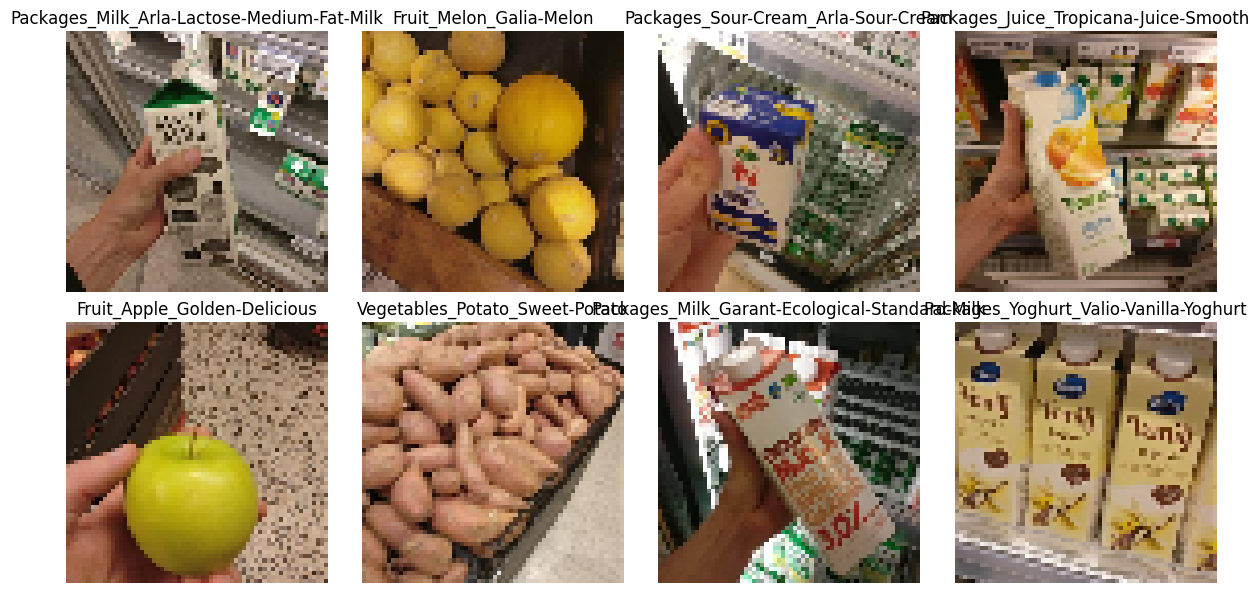

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(data_path, "train"),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

# Visualizar algunas imágenes
class_names = list(train_generator.class_indices.keys())
images, labels = next(train_generator)

plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")
plt.tight_layout()
plt.show()

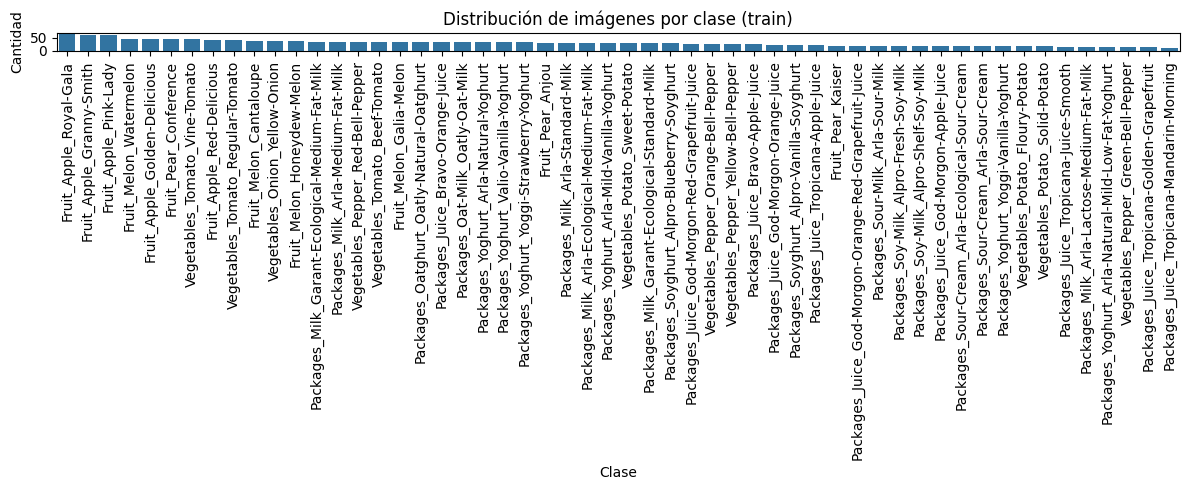

In [4]:
from collections import Counter

class_counts = Counter(train_generator.classes)
sorted_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(12, 5))
sns.barplot(x=[class_names[k] for k in sorted_counts.keys()],
            y=list(sorted_counts.values()))
plt.xticks(rotation=90)
plt.title("Distribución de imágenes por clase (train)")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

In [5]:
# Cargar set de validación
val_generator = train_datagen.flow_from_directory(
    os.path.join(data_path, "val"),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

# Comprobar que las clases coincidan
assert train_generator.class_indices == val_generator.class_indices
print("✅ Las clases del conjunto de entrenamiento y validación son consistentes.")

Found 355 images belonging to 54 classes.
✅ Las clases del conjunto de entrenamiento y validación son consistentes.


### ✍️ Reflexión: ¿hay clases poco representadas? ¿se requiere balanceo?

Sí, al analizar la distribución de imágenes por clase en el conjunto de entrenamiento se observa un ligero desbalance, existiendo algunas clases con una mayor cantidad de imágenes que otras. Esta situación podría afectar el rendimiento del modelo, especialmente al predecir clases con menor representación.De momento, no se aplicará una estrategia de balanceo en esta etapa exploratoria, pero se tendrá en cuenta para etapas posteriores del entrenamiento si las métricas lo requieren.